- <b>Classification algorithms</b>

- <b>Submitted by Kaushik </b>
- <b>email- kumarkaushik1580@gmail.com</b>
- <b>Hierarchical Clustering, DBSCAN, Gaussian Mixture</b>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds = pd.read_csv("Dataset_II.csv")
ds1 = pd.read_csv("Dataset_II.csv")

In [3]:
ds.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


# Data preprocessing

In [4]:
ds.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [5]:
ds.drop(["Unnamed: 0"],axis=1,inplace=True)
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [6]:
ds_null=ds.columns[ds.isnull().any()]
ds[ds_null].isnull().sum()

Saving accounts     183
Checking account    394
dtype: int64

ds["Saving accounts"].fillna(ds["Saving accounts"].mean(), inplace=True)
ds["Checking account"].fillna(ds["Checking account"].mean(), inplace=True)

In [7]:
ds["Saving accounts"].fillna(method='bfill',inplace=True)
ds["Checking account"].fillna(method='ffill',inplace=True)

In [8]:
ds.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [9]:
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,moderate,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [10]:
ds.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [11]:
ds_categ = list(ds.select_dtypes(exclude = ["number"]).columns)
ds_categ

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ds_categ:
    print(ds[i].unique())
    ds[i] = le.fit_transform(ds[i])

['male' 'female']
['own' 'free' 'rent']
['little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' 'rich']
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [13]:
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,1,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


ds_copy = ds.copy()

ds_copy.head()

# Feature Engineering
## Outlier Detection and treatment

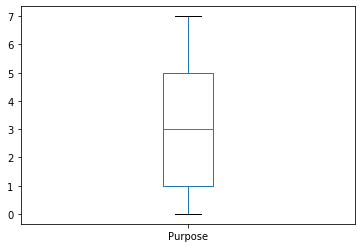

In [14]:
ds['Purpose'].plot.box()

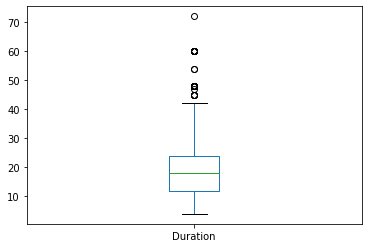

In [15]:
ds['Duration'].plot.box()

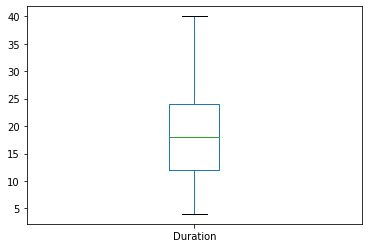

In [16]:
ds.loc[ds['Duration']>41,'Duration']=np.mean(ds['Duration'])
ds['Duration'].plot.box()

In [17]:
ds.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

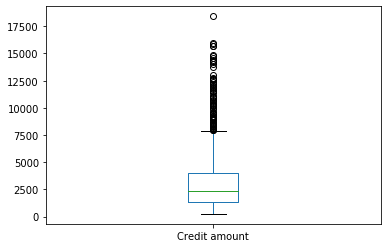

In [18]:
ds['Credit amount'].plot.box()

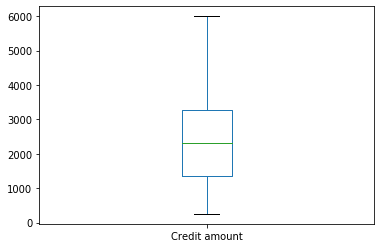

In [19]:
ds.loc[ds['Credit amount']>6000,'Credit amount']=np.mean(ds['Credit amount'])
ds['Credit amount'].plot.box()

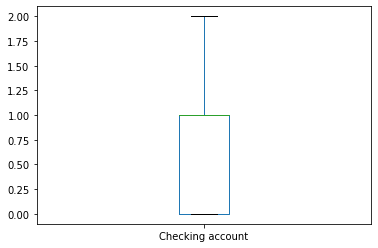

In [20]:
ds['Checking account'].plot.box()

ds.loc[ds['area_mean']>900,'area_mean']=np.mean(ds['area_mean'])
ds['area_mean'].plot.box()

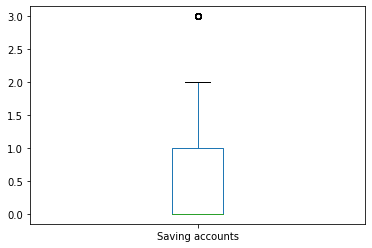

In [21]:
ds['Saving accounts'].plot.box()

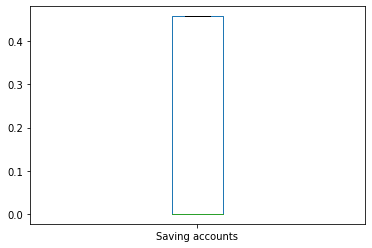

In [22]:
ds.loc[ds['Saving accounts']>0.45,'Saving accounts']=np.mean(ds['Saving accounts'])
ds['Saving accounts'].plot.box()

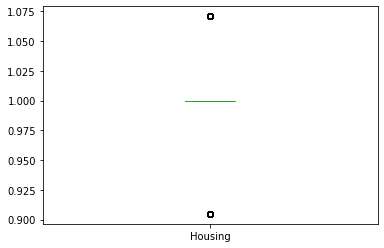

In [32]:
ds['Housing'].plot.box()

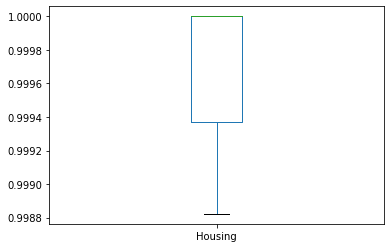

In [34]:
ds.loc[ds['Housing']>1.002,'Housing']=np.mean(ds['Housing'])
ds.loc[ds['Housing']<0.992,'Housing']=np.mean(ds['Housing'])
ds['Housing'].plot.box()

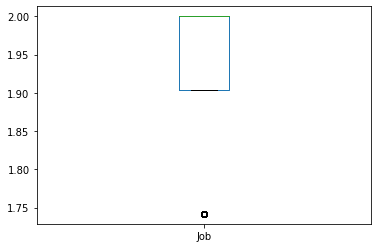

In [35]:
ds['Job'].plot.box()

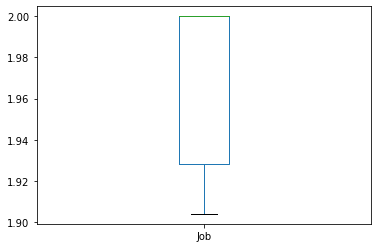

In [36]:
ds.loc[ds['Job']>2.0,'Job']=np.mean(ds['Job'])
ds.loc[ds['Job']<1.75,'Job']=np.mean(ds['Job'])
ds['Job'].plot.box()

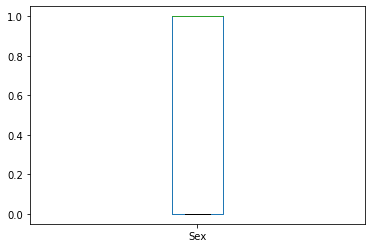

In [37]:
ds['Sex'].plot.box()

ds.loc[ds['concave points_mean']>0.160,'concave points_mean']=np.mean(ds['concave points_mean'])
ds['concave points_mean'].plot.box()

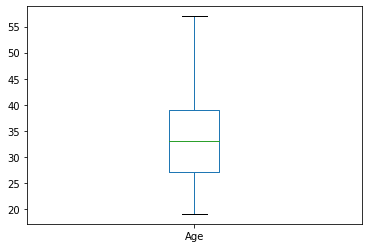

In [38]:
ds['Age'].plot.box()

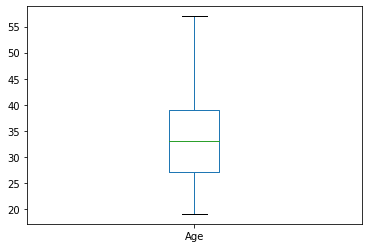

In [39]:
ds.loc[ds['Age']>57,'Age']=np.mean(ds['Age'])
#ds.loc[ds['symmetry_mean']<0.12,'symmetry_mean']=np.mean(ds['symmetry_mean'])

ds['Age'].plot.box()

In [40]:
ds.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.865214,0.690000,1.969912,0.999760,0.119538,0.637000,2438.589442,18.598143,2.878000
std,8.799675,0.462725,0.039952,0.000405,0.201245,0.640032,1248.518270,8.463538,1.978138
min,19.000000,0.000000,1.904000,0.998822,0.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,0.000000,1.928470,0.999368,0.000000,0.000000,1365.500000,12.000000,1.000000
50%,33.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2319.500000,18.000000,3.000000
75%,39.000000,1.000000,2.000000,1.000000,0.458000,1.000000,3271.258000,24.000000,5.000000
max,57.000000,1.000000,2.000000,1.000000,0.458000,2.000000,5998.000000,40.000000,7.000000


In [41]:
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,35.546,1,2.00000,1.000000,0.0,0,1169.000,6.000,5
1,22.000,0,2.00000,1.000000,0.0,1,5951.000,20.903,5
2,49.000,1,1.92847,1.000000,0.0,1,2096.000,12.000,3
3,45.000,1,2.00000,0.998822,0.0,0,3271.258,20.903,4
4,53.000,1,2.00000,0.998822,0.0,0,4870.000,24.000,1


In [42]:
ds.shape

(1000, 9)

In [43]:
ds_1 = ds.copy()

In [44]:
ds2=ds.copy()

In [45]:
ds_1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,35.546,1,2.00000,1.000000,0.0,0,1169.000,6.000,5
1,22.000,0,2.00000,1.000000,0.0,1,5951.000,20.903,5
2,49.000,1,1.92847,1.000000,0.0,1,2096.000,12.000,3
3,45.000,1,2.00000,0.998822,0.0,0,3271.258,20.903,4
4,53.000,1,2.00000,0.998822,0.0,0,4870.000,24.000,1


In [46]:
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,35.546,1,2.00000,1.000000,0.0,0,1169.000,6.000,5
1,22.000,0,2.00000,1.000000,0.0,1,5951.000,20.903,5
2,49.000,1,1.92847,1.000000,0.0,1,2096.000,12.000,3
3,45.000,1,2.00000,0.998822,0.0,0,3271.258,20.903,4
4,53.000,1,2.00000,0.998822,0.0,0,4870.000,24.000,1


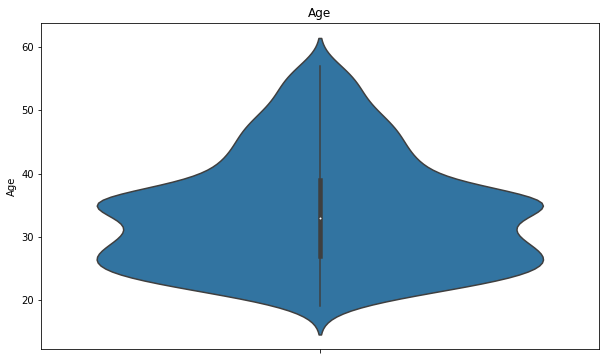

In [47]:
plt.figure(figsize=(10,6))
plt.title("Age")
sns.axes_style("dark")
sns.violinplot(y=ds["Age"])
plt.show()

In [48]:
ds.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

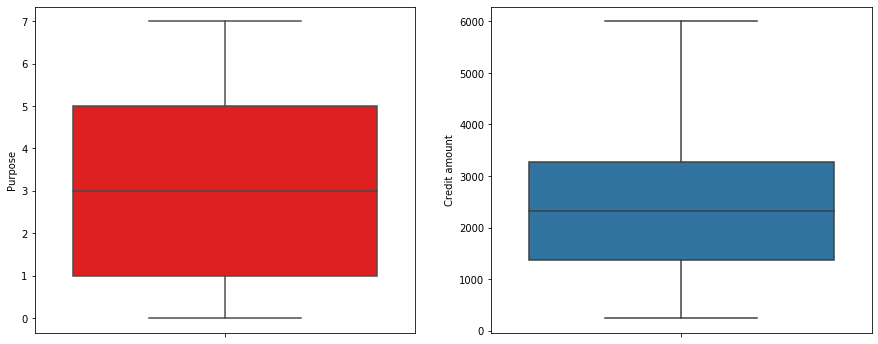

In [49]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=ds["Purpose"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=ds["Credit amount"])
plt.show()

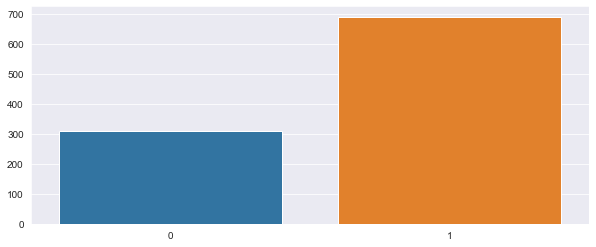

In [50]:
genders = ds.Sex.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [51]:
X = ds[["Purpose","Credit amount"]]
Y = ds[["Purpose","Checking account"]]
Z = ds[["Purpose","Saving accounts"]]
A = ds[["Purpose","Housing"]]
B = ds[["Purpose","Job"]]

In [52]:
ds.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,35.546,1,2.00000,1.000000,0.0,0,1169.000,6.000,5
1,22.000,0,2.00000,1.000000,0.0,1,5951.000,20.903,5
2,49.000,1,1.92847,1.000000,0.0,1,2096.000,12.000,3
3,45.000,1,2.00000,0.998822,0.0,0,3271.258,20.903,4
4,53.000,1,2.00000,0.998822,0.0,0,4870.000,24.000,1


# Hierarchical Clustering

In [53]:
from sklearn.preprocessing import normalize
data_scaled = normalize(ds)
data_scaled = pd.DataFrame(ds, columns=ds.columns)
data_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,35.546,1,2.00000,1.000000,0.0,0,1169.000,6.000,5
1,22.000,0,2.00000,1.000000,0.0,1,5951.000,20.903,5
2,49.000,1,1.92847,1.000000,0.0,1,2096.000,12.000,3
3,45.000,1,2.00000,0.998822,0.0,0,3271.258,20.903,4
4,53.000,1,2.00000,0.998822,0.0,0,4870.000,24.000,1


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(ds)

In [54]:
pd.DataFrame(ds).describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.865214,0.690000,1.969912,0.999760,0.119538,0.637000,2438.589442,18.598143,2.878000
std,8.799675,0.462725,0.039952,0.000405,0.201245,0.640032,1248.518270,8.463538,1.978138
min,19.000000,0.000000,1.904000,0.998822,0.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,0.000000,1.928470,0.999368,0.000000,0.000000,1365.500000,12.000000,1.000000
50%,33.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2319.500000,18.000000,3.000000
75%,39.000000,1.000000,2.000000,1.000000,0.458000,1.000000,3271.258000,24.000000,5.000000
max,57.000000,1.000000,2.000000,1.000000,0.458000,2.000000,5998.000000,40.000000,7.000000


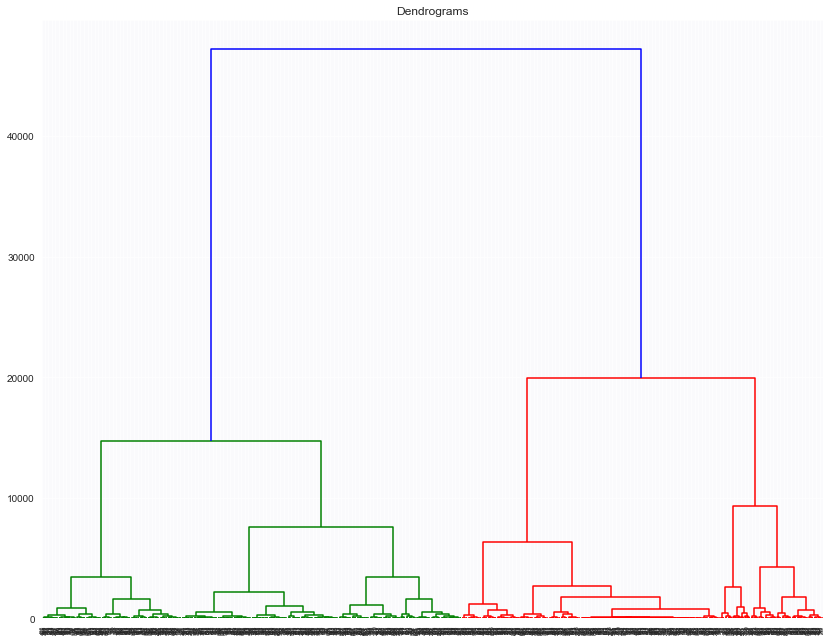

In [55]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14, 11))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 30 and cut the dendrogram:

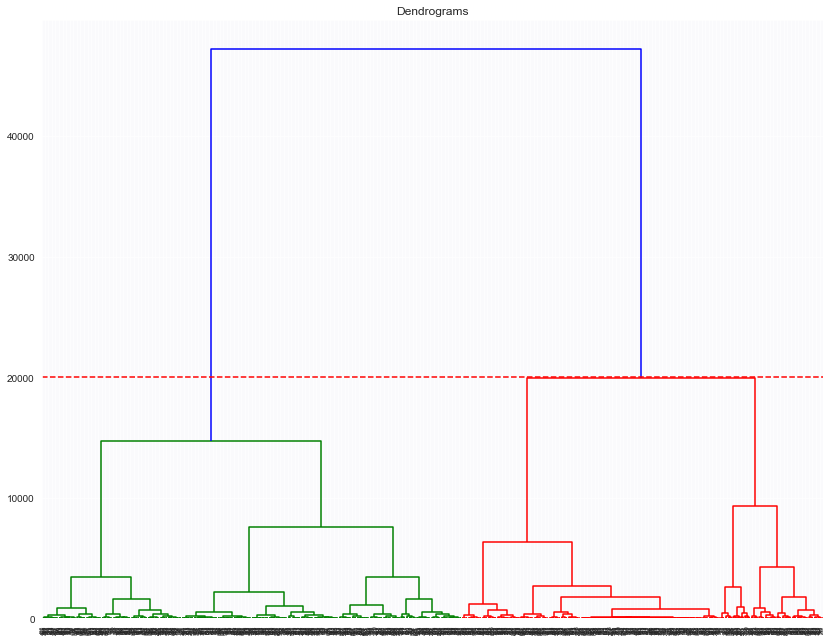

In [56]:
plt.figure(figsize=(14, 11))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=20000, color='r', linestyle='--')

In [57]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

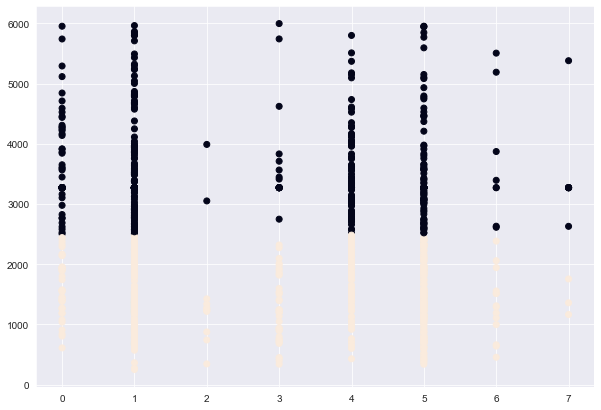

In [58]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Purpose'], data_scaled['Credit amount'], c=cluster.labels_ ) 

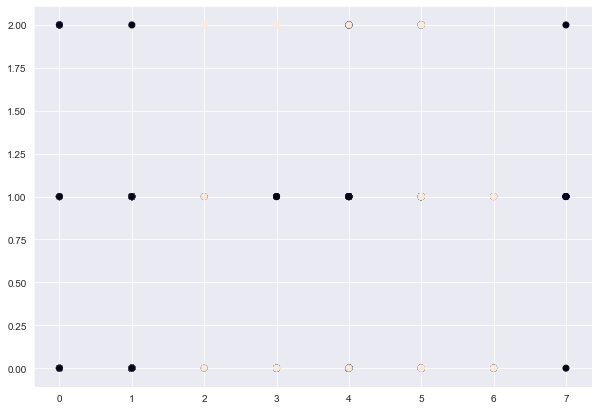

In [59]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Purpose'], data_scaled['Checking account'], c=cluster.labels_) 

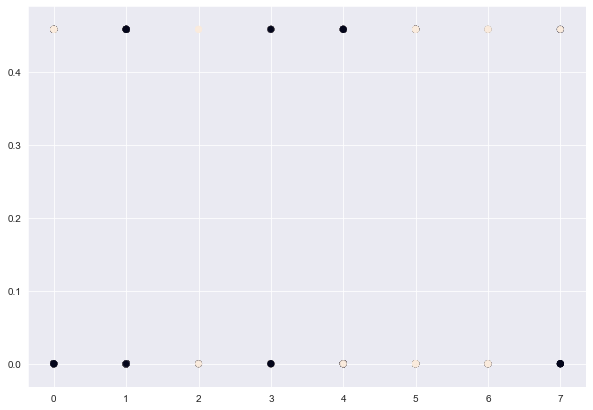

In [60]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Purpose'], data_scaled['Saving accounts'], c=cluster.labels_) 

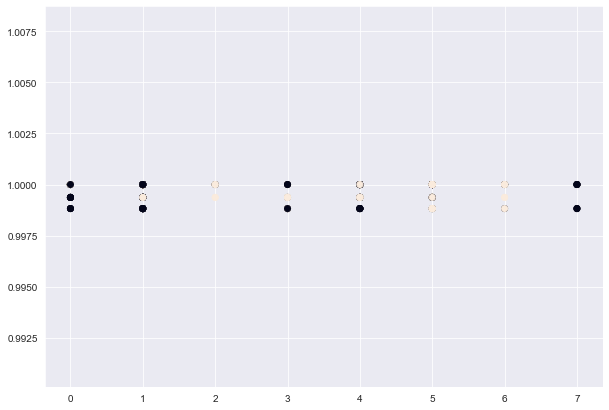

In [61]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Purpose'], data_scaled['Housing'], c=cluster.labels_) 

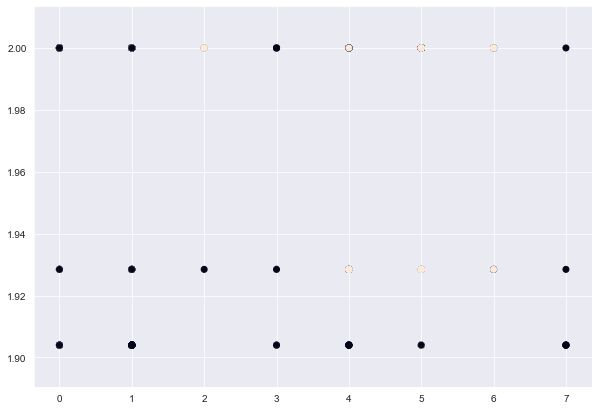

In [62]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Purpose'], data_scaled['Job'], c=cluster.labels_) 

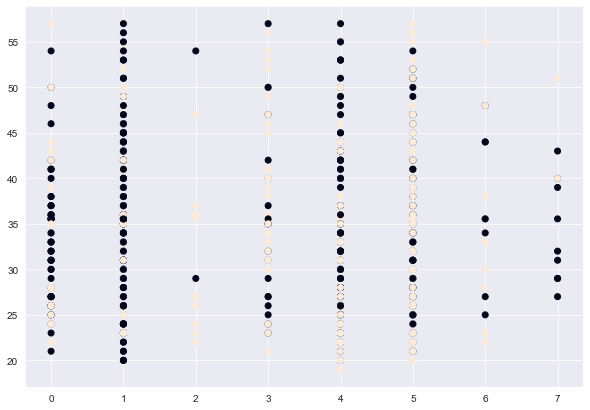

In [63]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Purpose'], data_scaled['Age'], c=cluster.labels_) 

# DBSCAN

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [65]:
ds_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null float64
Sex                 1000 non-null int32
Job                 1000 non-null float64
Housing             1000 non-null float64
Saving accounts     1000 non-null float64
Checking account    1000 non-null int32
Credit amount       1000 non-null float64
Duration            1000 non-null float64
Purpose             1000 non-null int32
dtypes: float64(6), int32(3)
memory usage: 58.7 KB


In [66]:
ds_1.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.865214,0.690000,1.969912,0.999760,0.119538,0.637000,2438.589442,18.598143,2.878000
std,8.799675,0.462725,0.039952,0.000405,0.201245,0.640032,1248.518270,8.463538,1.978138
min,19.000000,0.000000,1.904000,0.998822,0.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,0.000000,1.928470,0.999368,0.000000,0.000000,1365.500000,12.000000,1.000000
50%,33.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2319.500000,18.000000,3.000000
75%,39.000000,1.000000,2.000000,1.000000,0.458000,1.000000,3271.258000,24.000000,5.000000
max,57.000000,1.000000,2.000000,1.000000,0.458000,2.000000,5998.000000,40.000000,7.000000


In [67]:
ds_1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,35.546,1,2.00000,1.000000,0.0,0,1169.000,6.000,5
1,22.000,0,2.00000,1.000000,0.0,1,5951.000,20.903,5
2,49.000,1,1.92847,1.000000,0.0,1,2096.000,12.000,3
3,45.000,1,2.00000,0.998822,0.0,0,3271.258,20.903,4
4,53.000,1,2.00000,0.998822,0.0,0,4870.000,24.000,1


In [68]:
ds_1.drop(["Sex"], axis = 1, inplace = True)

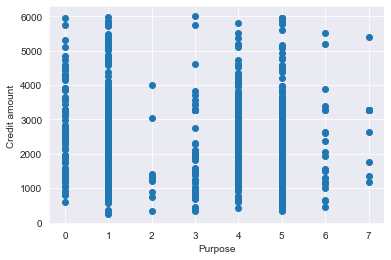

In [69]:
x = ds_1['Purpose']
y = ds_1['Credit amount']

plt.scatter(x,y)
plt.xlabel("Purpose")
plt.ylabel("Credit amount")
plt.show()

In [70]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(ds_1) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

         P1        P2
0  0.792543 -0.215030
1 -0.346856 -0.578458
2  0.248457  0.715946
3 -0.306945 -0.097626
4 -0.657938  0.106406


In [86]:
db_default = DBSCAN(eps = 0.1, min_samples = 15).fit(X_principal) 
labels = db_default.labels_ 

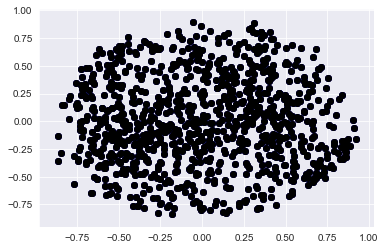

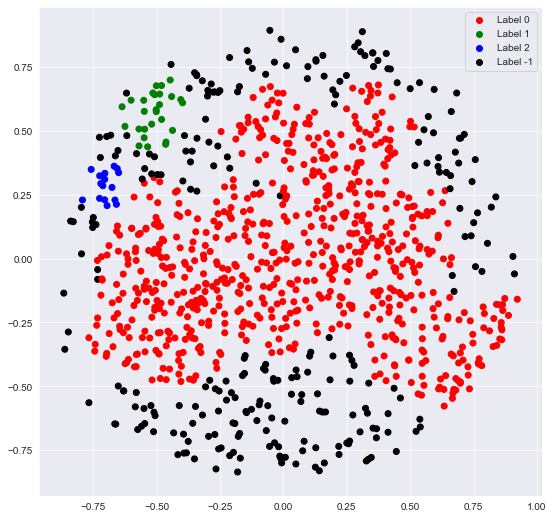

In [87]:
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
  
plt.show()

In [88]:
db = DBSCAN(eps = 0.1, min_samples = 70).fit(X_principal) 
labels1 = db.labels_ 

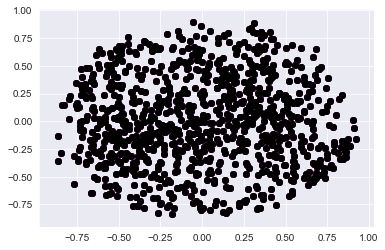

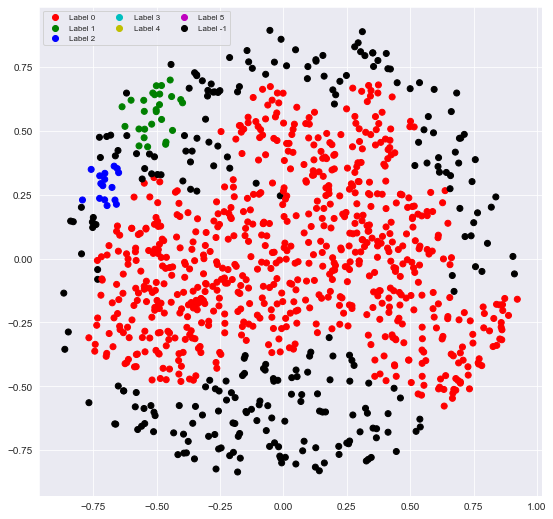

In [89]:
colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0]) 
g = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1]) 
b = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2]) 
c = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3]) 
y = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4]) 
m = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5]) 
k = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3','Label 4','Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show() 


ds_1 = ds_1[["Purpose", "Credit amount"]]
ds_1 = ds_1.as_matrix().astype("float32", copy = False)

stscaler = StandardScaler().fit(ds_1)
ds_1 = stscaler.transform(ds_1)

dbsc = DBSCAN(eps = .5, min_samples = 15).fit(ds_1)

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

colours = {} 
colours[0]='r'
colours[1]='g'
colours[2]='b'
colours[-1]='k'

cvec = [colours[label] for label in labels] 

r = plt.scatter(ds_1['Purpose'], ds_1['Credit amount'], color ='r');
g = plt.scatter(ds_1['Purpose'], ds_1['Credit amount'], color ='g');
b = plt.scatter(ds_1['Purpose'], ds_1['Credit amount'], color ='b'); 
k = plt.scatter(ds_1['Purpose'], ds_1['Credit amount'], color ='k'); 


plt.figure(figsize =(9, 9)) 
plt.scatter(ds_1['Purpose'], ds_1['Credit amount'], c = cvec)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 

# plt.scatter(core_samples,labels)

plt.show()

# Gaussian

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(ds2)

In [90]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
gmm.fit(ds2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [91]:
labels = gmm.predict(ds2)
frame = pd.DataFrame(ds2)
frame['cluster'] = labels
frame.columns = ['Age', 'Sex','Job','Housing','Saving accounts','Checking acoount', 'Credit amount', 'Duration','Purpose', 'cluster']

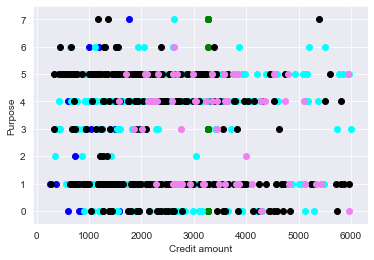

In [92]:
color=['blue','green','cyan', 'black','violet']
for k in range(0,5):
    ds2 = frame[frame["cluster"]==k]
    plt.scatter(ds2["Credit amount"],ds2["Purpose"],c=color[k])
    
plt.xlabel('Credit amount')
plt.ylabel('Purpose')
plt.show()